<a href="https://colab.research.google.com/github/SrijanDwivedi/COVID-19-Chest-X-Rays-Classification-using-CNN/blob/main/COVID_19_Chest_X_Rays_Classification_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = os.path.join('/content/drive/MyDrive/Dataset/','COVID-19_Chest_X_Rays')
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')

# Understanding the Data 

In [ ]:
train_covid_dir = os.path.join(train_dir, 'covid')  
train_normal_dir = os.path.join(train_dir, 'normal') 
validation_covid_dir = os.path.join(validation_dir, 'covid')  
validation_normal_dir = os.path.join(validation_dir, 'normal') 

In [ ]:
num_covid_tr = len(os.listdir(train_covid_dir))
num_normal_tr = len(os.listdir(train_normal_dir))

num_covid_val = len(os.listdir(validation_covid_dir))
num_normal_val = len(os.listdir(validation_normal_dir))

total_train = num_covid_tr + num_normal_tr
total_val = num_covid_val + num_normal_val

In [ ]:
print('total training covid images:', num_covid_tr)
print('total training normal images:', num_normal_tr)

print('total validation covid images:', num_covid_val)
print('total validation normal images:', num_normal_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training covid images: 250
total training normal images: 203
total validation covid images: 100
total validation normal images: 119
--
Total training images: 453
Total validation images: 219


# Setting Model Parameters

In [ ]:
Batch_Size = 16
Image_Size = 500

#Data Augmentation
### Creating Training data generator

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      )

train_data_gen = image_gen_train.flow_from_directory(batch_size=Batch_Size,
                                                     directory=train_dir,
                                                     color_mode = 'grayscale',
                                                     target_size=(Image_Size,Image_Size),
                                                     class_mode='binary')

Found 453 images belonging to 2 classes.


# Visualizing the Data

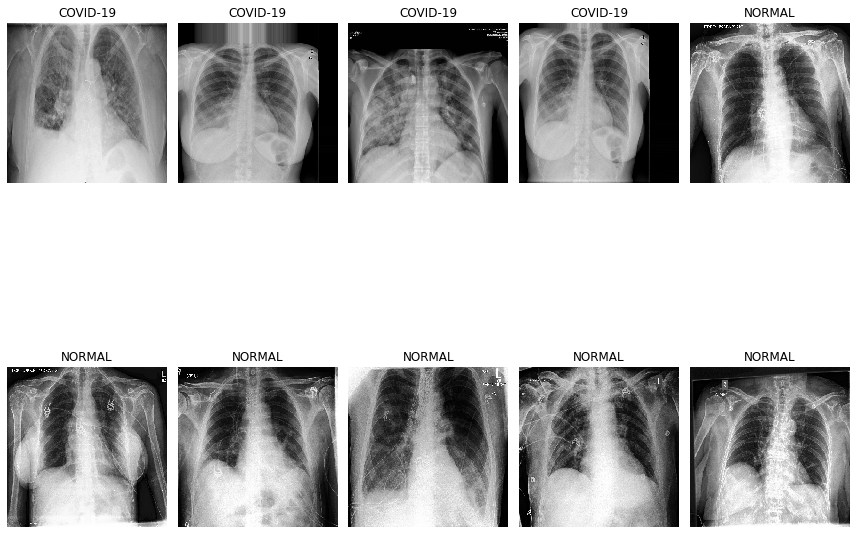

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,10):
  plt.subplot(2,5,i+1)
  for X_batch, Y_batch in train_data_gen:
        image = X_batch[0]        
        dic = {0:'COVID-19', 1:'NORMAL'}
        plt.title(dic.get(Y_batch[0]))
        plt.axis('off')
        plt.imshow(np.squeeze(image),cmap='gray',interpolation='nearest')
        break
plt.tight_layout()
plt.show()

# Creating Validation Data generator

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=Batch_Size,
                                                 directory=validation_dir,
                                                 color_mode = 'grayscale',
                                                 shuffle=False,
                                                 target_size=(Image_Size, Image_Size),
                                                 class_mode='binary')

Found 219 images belonging to 2 classes.


# Model Creation
## Define the model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(500, 500, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])

# Compiling the model

In [ ]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        1

# Training the model

In [ ]:
epochs= 15
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(Batch_Size))),
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(Batch_Size)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
29/29 [==============================] - 24s 703ms/step - loss: 0.6927 - accuracy: 0.5432 - val_loss: 0.6850 - val_accuracy: 0.7260
Epoch 2/15
29/29 [==============================] - 19s 681ms/step - loss: 0.6180 - accuracy: 0.7446 - val_loss: 0.4861 - val_accuracy: 0.8037
Epoch 3/15
29/29 [==============================] - 19s 665ms/step - loss: 0.4513 - accuracy: 0.8194 - val_loss: 0.5032 - val_accuracy: 0.7763
Epoch 4/15
29/29 [==============================] - 19s 666ms/step - loss: 0.5082 - accuracy: 0.7952 - val_loss: 0.4341 - val_accuracy: 0.8037
Epoch 5/15
29/29 [==============================] - 19s 665ms/step - loss: 0.3033 - accuracy: 0.8927 - val_loss: 0.3336 - val_accuracy: 0.8904
Epoch 6/15
29/29 [==============================] - 19s 664ms/step - loss: 0.3300 - accuracy: 0.8522 - val_loss: 0.3776 - val_accuracy: 0.8630
Epoch 7/15
29/29 [==============================] - 19s 661ms/step - loss: 0.3047 - accuracy: 0.8824 - val_loss: 0.3300 - val_accuracy: 0.8858

# Model Architecture

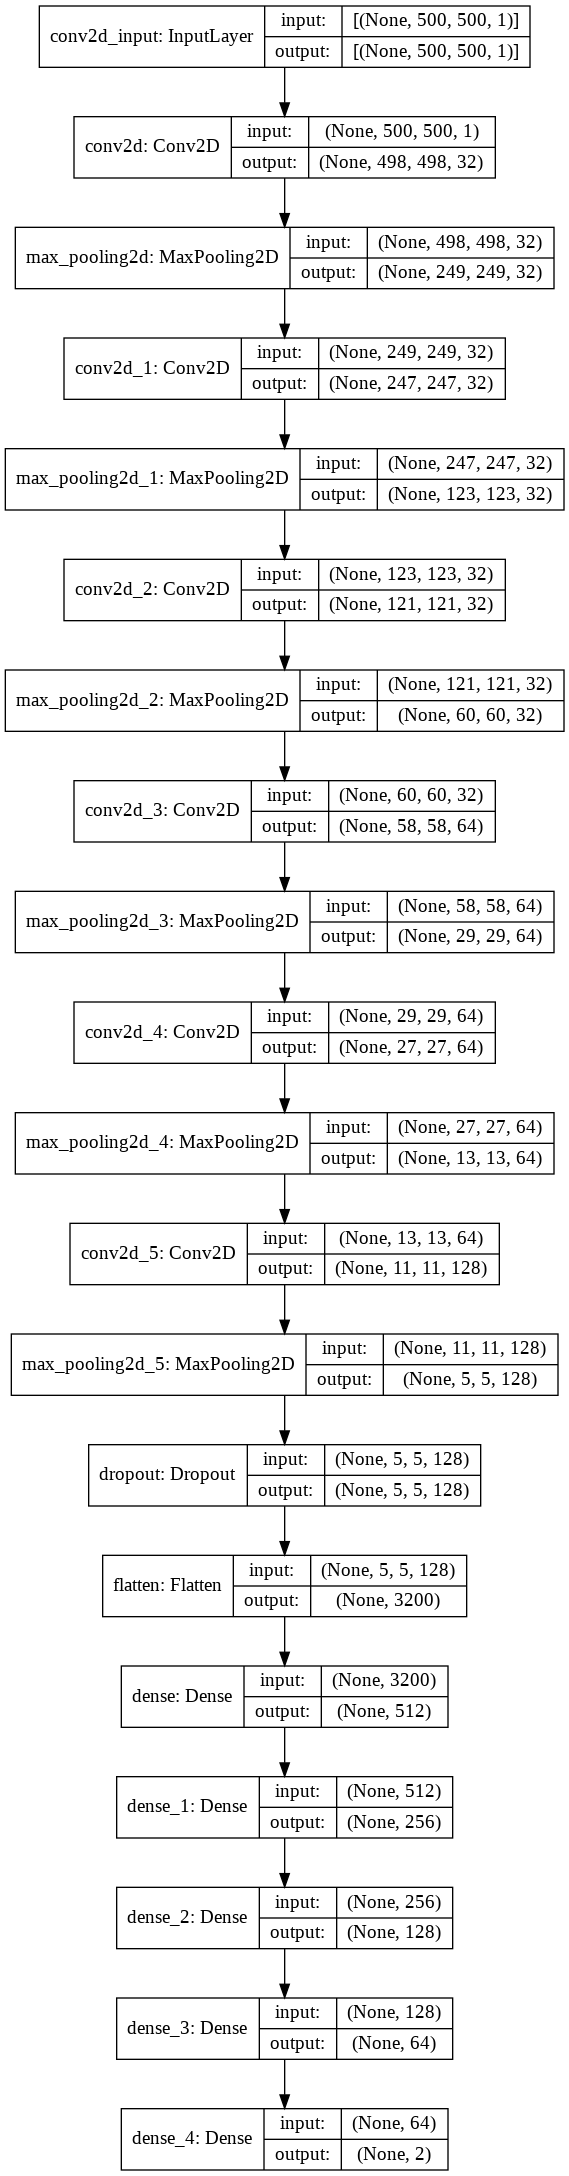

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

# Visualizing results of the training

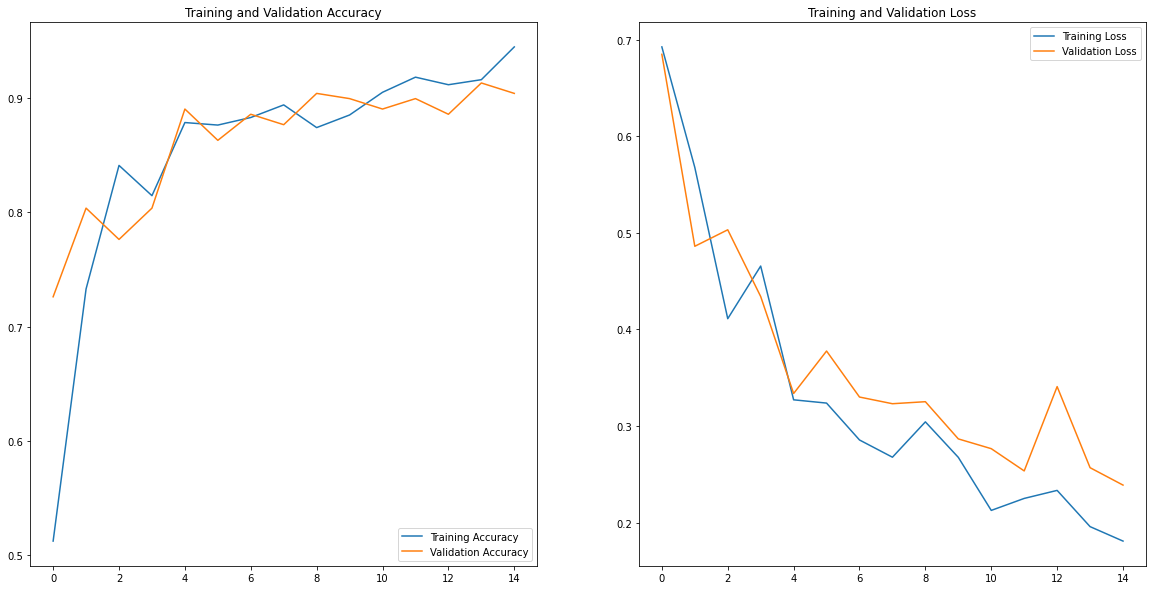

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Visualizing the accuracy and loss on Training and Validation data

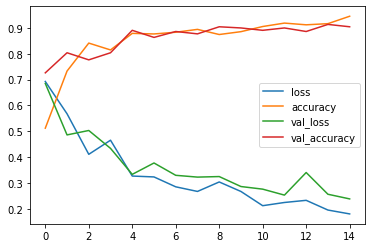

In [ ]:
pd.DataFrame(model.history.history).plot()

## Loss on Training Data

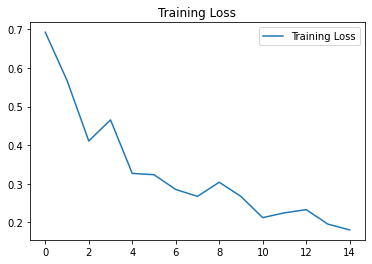

In [ ]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

##Loss on Validation Data

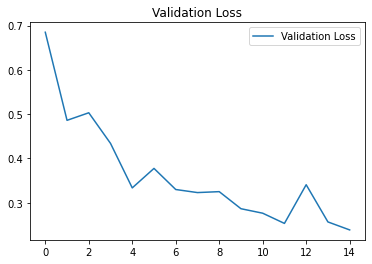

In [ ]:
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()

# Determining the accuracy of the model on Validation Data

In [ ]:
test_accu = model.evaluate(val_data_gen)
print('The testing accuracy is :',test_accu[1]*100, '%')



14/14 [==============================] - 5s 339ms/step - loss: 0.2388 - accuracy: 0.9041
The testing accuracy is : 90.41095972061157 %


# Determining the accuracy of the model on Training Data

In [ ]:
train_accu = model.evaluate(train_data_gen)
print('The training accuracy is :',train_accu[1]*100, '%')

29/29 [==============================] - 14s 466ms/step - loss: 0.1712 - accuracy: 0.9316
The training accuracy is : 93.15673112869263 %


#Result Analysis using Classification Report

In [ ]:

validation_steps = int(np.ceil(total_val / float(Batch_Size)))

predictions = model.predict_generator(val_data_gen, steps = validation_steps)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_data_gen.classes


report = classification_report(true_classes, predicted_classes, target_names=['COVID-19','NORMAL'])
print(report) 



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

    COVID-19       0.86      0.94      0.90       100
      NORMAL       0.95      0.87      0.91       119

    accuracy                           0.90       219
   macro avg       0.90      0.91      0.90       219
weighted avg       0.91      0.90      0.90       219



# Result Analysis using confusion matrix

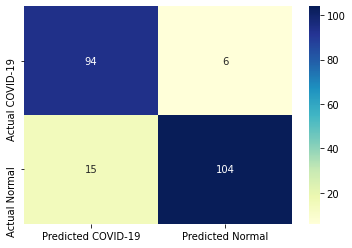

In [ ]:
cm = pd.DataFrame(data=confusion_matrix(true_classes, predicted_classes, labels=[0, 1]),index=["Actual COVID-19", "Actual Normal"],
columns=["Predicted COVID-19", "Predicted Normal"])
sns.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")